# Postwork Sesión 7 - NLP

Según Wikipedia
> El procesamiento de lenguaje natural,1​2​ abreviado PLN3​4​ —en inglés, natural language processing, NLP— es un campo de las ciencias de la computación, de la inteligencia artificial y de la lingüística que estudia las interacciones entre las computadoras y el lenguaje humano. Se ocupa de la formulación e investigación de mecanismos eficaces computacionalmente para la comunicación entre personas y máquinas por medio del lenguaje natural, es decir, de las lenguas del mundo

 Haremos uso de este para explorar los titulos de las canciones de nuestro dataset.

## 1. Utiliza patrones Regex para limpiar tus datos estructurados

Importemos las librerias necesarias para la limpieza y unas cuantas mas que nos podran ayudar a explorar la información.

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Importemos el dataset

In [2]:
path_datasets = os.path.join("Postworks", "Datasets")
path_datasets

'Postworks/Datasets'

In [3]:
os.listdir(path_datasets)

['data_delimited.csv', 'dict_spotify_raw.json']

In [4]:
df_filename = os.listdir(path_datasets)[0]

In [5]:
path_df = os.path.join(path_datasets, df_filename)
path_df

'Postworks/Datasets/data_delimited.csv'

In [6]:
df = pd.read_csv(path_df)

In [7]:
df.head()

,Unnamed: 0,added_at,is_local,added_by.type,track.album.album_type,track.album.id,track.album.name,track.album.release_date,track.album.release_date_precision,track.album.total_tracks,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,0,2020-12-01T05:02:00Z,False,user,album,4yP0hdKOZPNshxUOjY0cZj,After Hours,2020-03-20,day,14,...,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0VjIjW4GlUZAMYd2vXMi3b,4
1,1,2020-12-01T05:02:00Z,False,user,single,31IDBea3eEs57a0joX6TjN,Dance Monkey,2019-05-10,day,1,...,-6.401,0,0.0988,0.68800,0.000161,0.1700,0.540,98.078,1rgnBhdG2JDFTbYkYRZAku,4
2,2,2020-12-01T05:02:00Z,False,user,album,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,day,16,...,-6.687,0,0.0559,0.10400,0.000000,0.7900,0.642,116.971,0nbXyq5TXYPCO7pr3N8S4I,4
3,3,2020-12-01T05:02:00Z,False,user,single,6XcYTEonLIpg9NpAbJnqrC,Roses (Imanbek Remix),2019-09-13,day,1,...,-5.457,1,0.0506,0.01490,0.004320,0.2850,0.894,121.962,2Wo6QQD1KMDWeFkkjLqwx5,4
4,4,2020-12-01T05:02:00Z,False,user,album,7fJJK56U9fHixgO0HQkhtI,Future Nostalgia,2020-03-27,day,11,...,-4.521,0,0.0830,0.01230,0.000000,0.0951,0.679,123.950,3PfIrDoz19wz7qK7tYeu62,4


Deshagámosnos de esta columna extra, posiblemente un índice que se quedo ahí despues de un `reset_index` y usemos regex para limpiar los track names.

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
track_names = df['track.name'].str.lower()
track_names = track_names.str.replace('[^\s\w]', '')
track_names = track_names.str.replace('\d', '') 

<ipython-input-9-385a5cfbe1cd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  track_names = track_names.str.replace('[^\s\w]', '')
<ipython-input-9-385a5cfbe1cd>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  track_names = track_names.str.replace('\d', '')


In [10]:
track_names

0                                       blinding lights
1                                          dance monkey
2                                               the box
3                                  roses  imanbek remix
4                                        dont start now
                             ...                       
2045                            never be the same again
2046                                   get it on tonite
2047              absolutely story of a girl  radio mix
2048                                       i wanna know
2049    move your body  gabry ponte original radio edit
Name: track.name, Length: 2050, dtype: object

Ahora importemos `nltk` y *tokenizemos* los títulos.

In [11]:
import nltk

In [12]:
tokenized_tracks = track_names.apply(nltk.word_tokenize)
tokenized_tracks

0                                      [blinding, lights]
1                                         [dance, monkey]
2                                              [the, box]
3                                 [roses, imanbek, remix]
4                                      [dont, start, now]
                              ...                        
2045                        [never, be, the, same, again]
2046                                [get, it, on, tonite]
2047         [absolutely, story, of, a, girl, radio, mix]
2048                                   [i, wan, na, know]
2049    [move, your, body, gabry, ponte, original, rad...
Name: track.name, Length: 2050, dtype: object

Sumemos todas las listas resultantes para tener una lista con todas las palabras que aparecen.

In [13]:
all_words = tokenized_tracks.sum()

## 2. Dado que debes de conocer bien tu dataset (excepto si es un nuevo dataset que buscaste para este Postwork), es probable que tengas una idea de las palabras que son relevantes para tu tema. Genera un objeto Text con la librería nltk y explora los contextos de las palabras que elegiste. Utiliza el método `similar` para obtener palabras que tengan contextos similares a las palabras originales. Puede que descubras nuevas palabras que tengan relevancia para tu proyecto.

Generemos el objeto Text

In [14]:
text= nltk.Text(all_words)

In [15]:
print(f'Número de palabras en el texto: {len(text)}')

Número de palabras en el texto: 6638


In [16]:
print(f'Número de palabras únicas en el texto: {len(set(text))}')


Número de palabras únicas en el texto: 1990


In [17]:
text.collocations()

radio edit; chris brown; nicki minaj; justin bieber; fifty shades; lil
wayne; bruno mars; dolla ign; jess glynne; selena gomez; radio mix;
sean paul; demi lovato; ellie goulding; empire state; flo rida;
kendrick lamar; sicko mode; tinie tempah; feat chris


Usemos `similar` para ver que otras palabras son similares en el contexto de nuestra información.

In [18]:
text.similar('feat')

with


In [19]:
text.similar('love')

want like know found breaking with beautiful people lose need hold
while summer and friends kiss miss make body america


In [20]:
text.similar('edit')

version mix


## 3. Utiliza el objeto FreqDist de nltk para hacer análisis estadístico de tu dataset. Explora las palabras y los bigramas más comunes de tu dataset.

In [21]:
freq_dist = nltk.FreqDist(all_words)

In [22]:
freq_dist

FreqDist({'feat': 273, 'you': 182, 'the': 164, 'me': 140, 'i': 118, 'love': 108, 'it': 91, 'my': 83, 'radio': 76, 'a': 70, ...})

In [23]:
freq_dist.most_common(50)

[('feat', 273),
 ('you', 182),
 ('the', 164),
 ('me', 140),
 ('i', 118),
 ('love', 108),
 ('it', 91),
 ('my', 83),
 ('radio', 76),
 ('a', 70),
 ('edit', 67),
 ('to', 60),
 ('in', 55),
 ('of', 55),
 ('like', 52),
 ('dont', 50),
 ('with', 49),
 ('on', 46),
 ('up', 37),
 ('your', 36),
 ('all', 35),
 ('what', 33),
 ('be', 31),
 ('u', 29),
 ('girl', 28),
 ('remix', 27),
 ('im', 27),
 ('let', 27),
 ('one', 27),
 ('this', 26),
 ('for', 25),
 ('go', 25),
 ('is', 23),
 ('do', 23),
 ('we', 23),
 ('know', 22),
 ('down', 21),
 ('no', 21),
 ('na', 21),
 ('life', 20),
 ('heart', 20),
 ('and', 20),
 ('get', 20),
 ('when', 19),
 ('just', 19),
 ('mix', 19),
 ('good', 18),
 ('cant', 18),
 ('out', 18),
 ('that', 18)]

Al ser títulos de canciones, es lógico suponer que no tenemos muchas palabras en cada oración y por lo tanto cada palabra debería aportar suficiente contexto. Podemos comprobar este supuesto de manera empírica al ver que aparecen muy pocas stop words en las mas altas frecuencias, sin embargo, eliminémolas por completo para estar seguros.

In [24]:
from nltk.corpus import stopwords

In [25]:
stopwords

<WordListCorpusReader in '/home/marioraulgz/nltk_data/corpora/stopwords'>

In [26]:
english_stop_words = stopwords.words('english')

all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

Ahora que hemos generado una nueva lista de palabras sin las *stop words*, calculemos la frecuencia nuevamente.

In [27]:
freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)
freq_dist_no_stop_words.most_common(50)

[('feat', 273),
 ('love', 108),
 ('radio', 76),
 ('edit', 67),
 ('like', 52),
 ('dont', 50),
 ('u', 29),
 ('girl', 28),
 ('remix', 27),
 ('im', 27),
 ('let', 27),
 ('one', 27),
 ('go', 25),
 ('know', 22),
 ('na', 21),
 ('life', 20),
 ('heart', 20),
 ('get', 20),
 ('mix', 19),
 ('good', 18),
 ('cant', 18),
 ('bad', 17),
 ('beautiful', 17),
 ('version', 17),
 ('dance', 15),
 ('lil', 15),
 ('song', 15),
 ('time', 15),
 ('way', 15),
 ('hey', 15),
 ('say', 14),
 ('back', 14),
 ('want', 14),
 ('gone', 14),
 ('never', 13),
 ('young', 13),
 ('wan', 13),
 ('got', 13),
 ('baby', 12),
 ('world', 12),
 ('boy', 12),
 ('call', 12),
 ('better', 12),
 ('right', 12),
 ('kiss', 12),
 ('brown', 12),
 ('little', 12),
 ('give', 12),
 ('home', 11),
 ('take', 11)]

In [28]:
# Contemos la frecuencia de longitudes de nuestras palabras

freq_dist_lengths = nltk.FreqDist([len(w) for w in all_words_except_stop_words])

Obtengamos la longitud de palabras que mas aparece y ademas el porcentaje que aporta al total.

In [29]:
freq_dist_lengths.max()

4

In [30]:
freq_dist_lengths[4]

1649

In [31]:
freq_dist_lengths.freq(4)

0.34988330150647146

Llama la atención la cantidad de *remixes* que existen en los títulos, veamos el porcentaje que aportan al conteo total.

In [32]:
print(f'{(100 * freq_dist_no_stop_words["remix"] / len(all_words_except_stop_words)):.3f}%')

0.573%


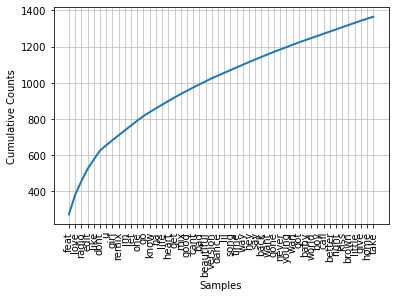

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [33]:
freq_dist_no_stop_words.plot(50, cumulative=True)

Ahora obtengamos los bigramas mas comúnes.

In [34]:
text_nostopwords = nltk.Text(all_words_except_stop_words)

In [35]:
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text_nostopwords)))

freq_dist_bigrams

FreqDist({('radio', 'edit'): 60, ('love', 'feat'): 14, ('wan', 'na'): 13, ('let', 'go'): 12, ('feat', 'lil'): 10, ('chris', 'brown'): 10, ('radio', 'mix'): 10, ('feat', 'chris'): 9, ('nicki', 'minaj'): 8, ('justin', 'bieber'): 7, ...})

In [36]:
freq_dist_bigrams.most_common(50)

[(('radio', 'edit'), 60),
 (('love', 'feat'), 14),
 (('wan', 'na'), 13),
 (('let', 'go'), 12),
 (('feat', 'lil'), 10),
 (('chris', 'brown'), 10),
 (('radio', 'mix'), 10),
 (('feat', 'chris'), 9),
 (('nicki', 'minaj'), 8),
 (('justin', 'bieber'), 7),
 (('feat', 'nicki'), 6),
 (('fifty', 'shades'), 6),
 (('lil', 'wayne'), 6),
 (('feat', 'tpain'), 6),
 (('got', 'ta'), 6),
 (('like', 'feat'), 5),
 (('feat', 'justin'), 5),
 (('dont', 'wan'), 5),
 (('like', 'love'), 5),
 (('edit', 'dont'), 5),
 (('gon', 'na'), 5),
 (('feat', 'jayz'), 5),
 (('feat', 'akon'), 5),
 (('radio', 'version'), 5),
 (('ty', 'dolla'), 4),
 (('dolla', 'ign'), 4),
 (('selena', 'gomez'), 4),
 (('cardi', 'b'), 4),
 (('chance', 'rapper'), 4),
 (('feat', 'jess'), 4),
 (('jess', 'glynne'), 4),
 (('feat', 'sean'), 4),
 (('sean', 'paul'), 4),
 (('na', 'know'), 4),
 (('let', 'love'), 4),
 (('love', 'u'), 4),
 (('dont', 'let'), 4),
 (('feat', 'bruno'), 4),
 (('bruno', 'mars'), 4),
 (('one', 'last'), 4),
 (('love', 'radio'), 4),
 

## 4. Realiza visualizaciones de tus conteos de frecuencias utilizando gráficas de barras.


Visualizemos las 20 palabras más comunes.

<ipython-input-37-d379ad12b112>:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  sns.barplot(x= most_common_20[:, 0], y=most_common_20[:, 1].astype('Int64'), ax=ax, palette='RdYlBu');


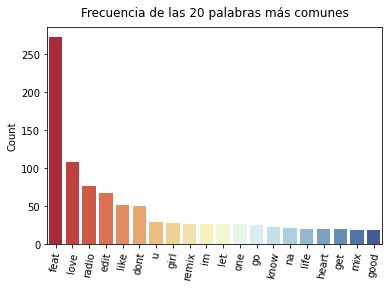

In [37]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(20))))

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x= most_common_20[:, 0], y=most_common_20[:, 1].astype('Int64'), ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

<ipython-input-38-190d1f339cee>:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  sns.barplot(x=most_common_50[:, 1].astype('Int64'), y=most_common_50[:, 0], ax=ax, palette='RdYlBu', orient='h');


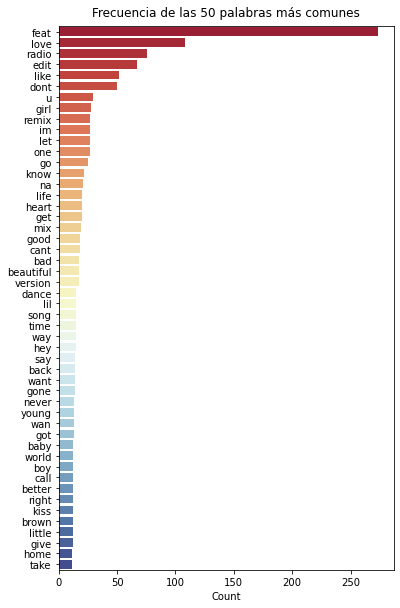

In [38]:
most_common_50 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(50))))

fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot()

sns.barplot(x=most_common_50[:, 1].astype('Int64'), y=most_common_50[:, 0], ax=ax, palette='RdYlBu', orient='h');
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_xlabel('Count');

<ipython-input-39-23d6129e3cdf>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))
<ipython-input-39-23d6129e3cdf>:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  sns.barplot(x= most_common_20[:, 0], y=most_common_20[:, 1].astype('Int64'), ax=ax, palette='RdYlBu');


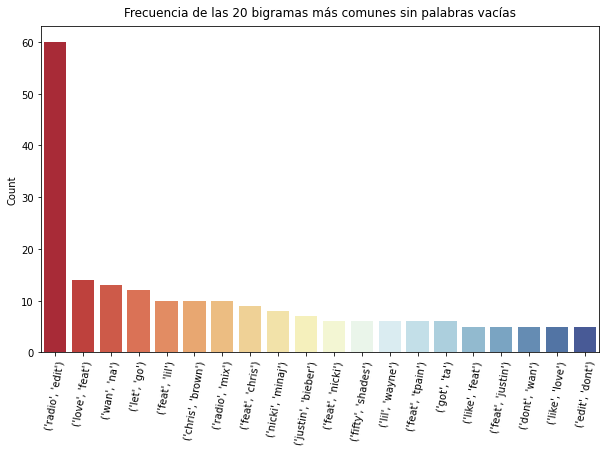

In [39]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x= most_common_20[:, 0], y=most_common_20[:, 1].astype('Int64'), ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

## 5. Realiza visualizaciones de las distribuciones de frecuencias de las longitudes de las palabras o de las oraciones.

In [40]:
#Podemos contar otras cosas, como la frecuencia de longitudes de nuestras palabras

freq_dist_lengths = nltk.FreqDist([len(w) for w in all_words_except_stop_words])

In [41]:
freq_dist_lengths.max()

4

In [42]:
freq_dist_lengths.freq(5)

0.2070867812433694

In [43]:
lenghts_words = [len(word) for word in all_words_except_stop_words]

/home/marioraulgz/miniconda3/envs/pyds/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

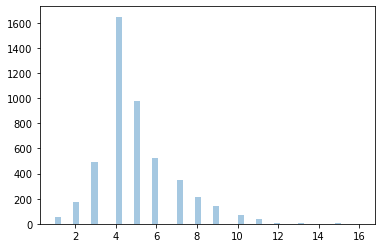

In [44]:
sns.distplot(lenghts_words, kde=False, norm_hist=False)

In [45]:
tracks_w_lengths = pd.DataFrame(track_names,)
tracks_w_lengths['lenghts'] = tracks_w_lengths['track.name'].str.split().str.len()

In [46]:
tracks_w_lengths

,track.name,lenghts
0,blinding lights,2
1,dance monkey,2
2,the box,2
3,roses imanbek remix,3
4,dont start now,3
...,...,...
2045,never be the same again,5
2046,get it on tonite,4
2047,absolutely story of a girl radio mix,7
2048,i wanna know,3


In [47]:
tracks_w_lengths.sort_values('lenghts', ascending= False, inplace=True)
tracks_w_lengths

,track.name,lenghts
283,i dont wanna live forever fifty shades darker ...,16
442,just like fire from the original motion pictur...,13
455,earned it fifty shades of grey from the fifty...,13
1410,when you gonna give it up to me feat keyshia c...,13
1022,all i do is win feat tpain ludacris snoop dogg...,12
...,...,...
1339,,0
212,,0
723,,0
328,,0


/home/marioraulgz/miniconda3/envs/pyds/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lenghts'>

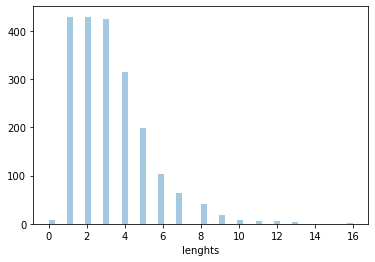

In [48]:
sns.distplot(tracks_w_lengths['lenghts'], kde=False, norm_hist=False)

Quitemos esas canciones que quedaron sin título, son aquellas que tenian puros caractéres especiales o números en su título

In [49]:
tracks_w_lengths.drop((tracks_w_lengths[tracks_w_lengths['lenghts'] == 0]).index, inplace=True)

In [50]:
tracks_w_lengths

,track.name,lenghts
283,i dont wanna live forever fifty shades darker ...,16
442,just like fire from the original motion pictur...,13
455,earned it fifty shades of grey from the fifty...,13
1410,when you gonna give it up to me feat keyshia c...,13
1022,all i do is win feat tpain ludacris snoop dogg...,12
...,...,...
997,telephone,1
1230,run,1
994,animal,1
990,bedrock,1


/home/marioraulgz/miniconda3/envs/pyds/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lenghts'>

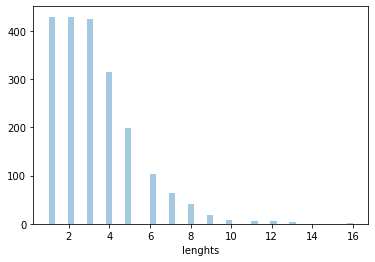

In [51]:
sns.distplot(tracks_w_lengths['lenghts'], kde=False, norm_hist=False)

## 6. Realiza nubes de palabras para detectar los temas más importantes de tu conjunto de datos.

In [52]:
from wordcloud import WordCloud

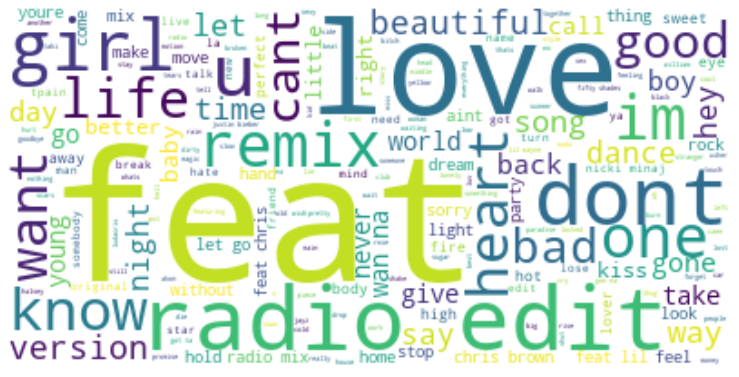

In [53]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(13, 13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Es interesante ver la cantidad de palabras que hacen alusion a que la canción en particular es una versión de otra. Y que a los artistas les gusta colaborar.

## 7. Haz un análisis de sentimientos de tu conjunto de datos, de preferencia utilizando una variable categórica para segmentar tus datos y poder comparar las distribuciones de polaridades entre cada segmento.

Importamos el Sentiment Intensity Analyzer de nltk

In [54]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia= SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

Lo probamos con una de las canciones

In [55]:
sia.polarity_scores(tracks_w_lengths['track.name'][6])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Ya que hicimos algunas operaciones que alteraron el órden original de nuestra data, guardemos el índice porque nos será de utilidad despues.

In [56]:
tracks_w_lengths['track.name']

283     i dont wanna live forever fifty shades darker ...
442     just like fire from the original motion pictur...
455     earned it fifty shades of grey  from the fifty...
1410    when you gonna give it up to me feat keyshia c...
1022    all i do is win feat tpain ludacris snoop dogg...
                              ...                        
997                                             telephone
1230                                                  run
994                                                animal
990                                               bedrock
985                                            impossible
Name: track.name, Length: 2043, dtype: object

In [60]:
index_ = tracks_w_lengths.index

Obtenemos el análisis de sentimientos de todos los títulos, luego usamos `json_normalize` para expandir los diccionarios resultantes a columnas. Usaremos el índice que guardamos anteriormente para conservar el orden original.

In [61]:
sentiments =tracks_w_lengths['track.name'].apply(lambda x: sia.polarity_scores(x))
sentiments = pd.json_normalize(sentiments)

In [62]:
sentiments.index =index_

In [63]:
sentiments

,neg,neu,pos,compound
283,0.00,0.859,0.141,0.3182
442,0.14,0.581,0.279,0.3400
455,0.00,0.821,0.179,0.1027
1410,0.00,1.000,0.000,0.0000
1022,0.00,0.725,0.275,0.5859
...,...,...,...,...
997,0.00,1.000,0.000,0.0000
1230,0.00,1.000,0.000,0.0000
994,0.00,1.000,0.000,0.0000
990,0.00,1.000,0.000,0.0000


In [64]:
tracks_w_lengths = pd.concat([tracks_w_lengths, sentiments], axis= 1)

In [65]:
tracks_w_lengths.index

Int64Index([ 283,  442,  455, 1410, 1022, 1386,  314,  530,  739,  706,
            ...
             996,  241,  243,  244,  998,  997, 1230,  994,  990,  985],
           dtype='int64', length=2043)

In [66]:
tracks_w_lengths

,track.name,lenghts,neg,neu,pos,compound
283,i dont wanna live forever fifty shades darker ...,16,0.00,0.859,0.141,0.3182
442,just like fire from the original motion pictur...,13,0.14,0.581,0.279,0.3400
455,earned it fifty shades of grey from the fifty...,13,0.00,0.821,0.179,0.1027
1410,when you gonna give it up to me feat keyshia c...,13,0.00,1.000,0.000,0.0000
1022,all i do is win feat tpain ludacris snoop dogg...,12,0.00,0.725,0.275,0.5859
...,...,...,...,...,...,...
997,telephone,1,0.00,1.000,0.000,0.0000
1230,run,1,0.00,1.000,0.000,0.0000
994,animal,1,0.00,1.000,0.000,0.0000
990,bedrock,1,0.00,1.000,0.000,0.0000


Ya que concatenamos, echemos un vistazo a algunas estadísticas de estos valores.

In [67]:
tracks_w_lengths[['neg','neu','pos','compound']].describe() 

,neg,neu,pos,compound
count,2043.000000,2043.000000,2043.000000,2043.000000
mean,0.082611,0.775970,0.141417,0.053791
std,0.221028,0.333643,0.281150,0.265678
min,0.000000,0.000000,0.000000,-0.735100
25%,0.000000,0.488000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.897900


Sabemos de antemano que el número se movera entre 0 y 1, para todas aquellos sentimientos que no sean compuestos. Despues de notar que el sentimiento neutral es el que predomina en los títulos, podemos ver que en general hay mayores sentimientos positivos que negativos. Aunque esto es con una variacion bastante grande, tomando en cuenta los valores en que se encuentran estos campos, por lo que podría no ser estadísticamente riguroso dar una verdad absoluta con esto.